<a href="https://colab.research.google.com/github/pndang/DSC140B/blob/main/DSC140B_HW2_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
def load_faces_data(filepath):
    """
    Load the faces dataset from CSV file.

    Args:
        filepath: Path to the CSV file containing the faces data

    Returns:
        numpy array of shape (n_samples, 4096)
    """
    # Load the data
    faces_data = pd.read_csv(filepath, header=None).values
    print(f"Loaded data with shape: {faces_data.shape}")
    return faces_data

Loaded data with shape: (400, 4096)


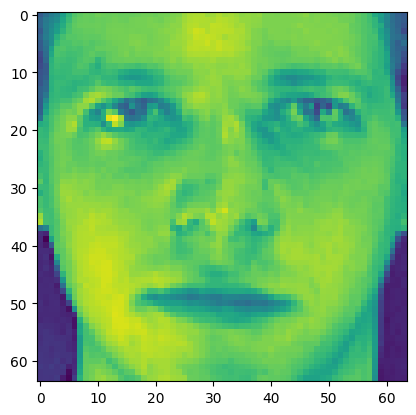

In [3]:
face_data = load_faces_data('https://f000.backblazeb2.com/file/dsc-data/faces.csv')

# Display an image
example_image = face_data[0]
plt.imshow(example_image.reshape((64, 64)))

# 4.a) PCA

In [4]:
def compute_pca(X):
    """
    Implement PCA from scratch using NumPy.

    Args:
        X: Input data matrix of shape (n_samples, n_features)

    Returns:
        mean_face: Mean face (center of the data)
        eigenvalues: Eigenvalues of the covariance matrix
        eigenvectors: Eigenvectors of the covariance matrix (principal components)
    """
    # ToDo: Step 1: Center the data by subtracting the mean face
    mean_face = np.mean(face_data, axis=0)
    X_centered = face_data - mean_face

    # ToDo: Step 2: Calculate the sample covariance matrix
    cov_matrix = np.cov(X_centered, rowvar=False)

    # ToDo: Step 3: Find the eigenvectors and eigenvalues of this matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # ToDo: Sort eigenvectors by decreasing eigenvalues
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]

    return mean_face, eigenvalues, eigenvectors

In [5]:
mean_face, eigenvalues, eigenvectors = compute_pca(face_data)

# 4.b) Visualize top Eigenvectors

In [16]:
def visualize_eigenvectors(eigenvectors, eigenvalues, n_components=3):
    """
    Visualize the top eigenvectors as faces.

    Args:
        eigenvectors: Matrix of eigenvectors
        eigenvalues: Array of eigenvalues
        n_components: Number of eigenvectors to visualize
    """
    fig, axes = plt.subplots(1, n_components, figsize=(15, 5))

    for i in range(n_components):
        # ToDo: Reshape the eigenvector to a 64x64 image
        eigenface = eigenvectors[:, i].reshape(64, 64)

        # ToDo: Normalize for better visualization
        eigenface = eigenface / np.max(np.abs(eigenface))

        # Display the eigenface
        axes[i].imshow(eigenface)
        axes[i].set_title(f'Eigenface {i+1}\nEigenvalue: {eigenvalues[i]:.2f}')
        axes[i].axis('off')

    plt.suptitle(f'Top {n_components} Eigenvectors (Eigenfaces)', fontsize=16)
    plt.tight_layout()
    plt.show()

Visualizing top 3 eigenvectors...


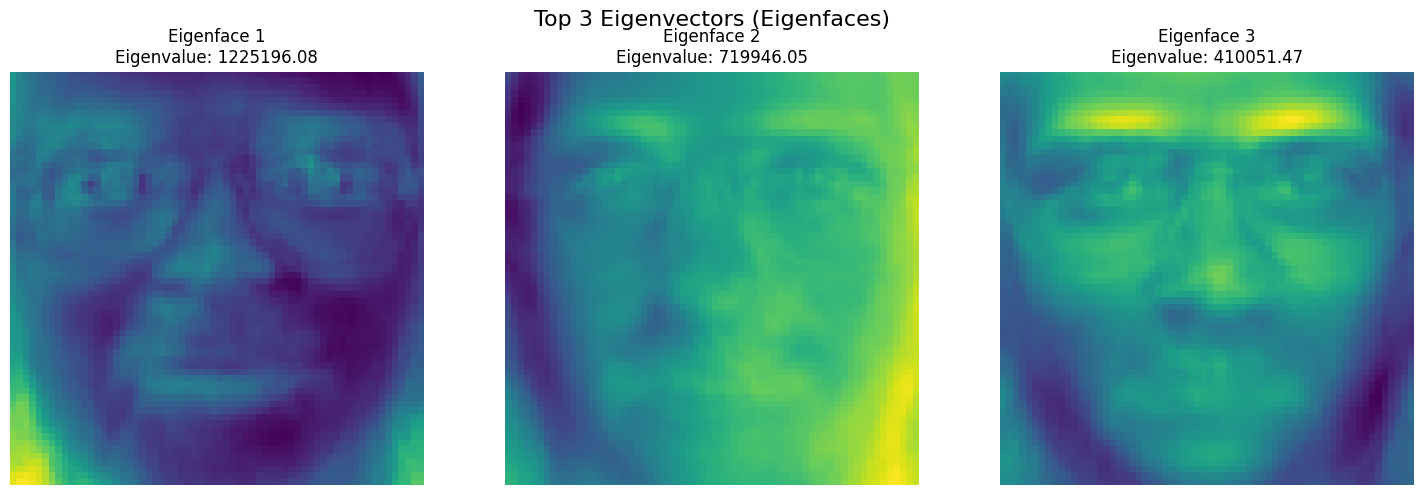

In [17]:
print("Visualizing top 3 eigenvectors...")
visualize_eigenvectors(eigenvectors, eigenvalues, 3)

# 4.c) Visualize Extreme Images

In [39]:
def find_extreme_examples(X, mean_face, eigenvectors, n_components = 3, n_extremes=3):
    """
    Find examples at the extremes of each eigenvector.

    Args:
        X: Input data matrix of shape (n_samples, n_features)
        mean_face: Mean face to center the data
        eigenvectors: Matrix of eigenvectors
        n_extremes: Number of extreme examples to find in each direction

    Returns:
        max_indices: List of indices of examples with maximum projection for each eigenvector
        min_indices: List of indices of examples with minimum projection for each eigenvector
        projections: Matrix of projections of each example onto each eigenvector
    """
    # ToDo: Center the data
    X_centered = X - mean_face

    # ToDo: Calculate projections of each face onto each eigenvector (Project centered data onto the eigenvector)
    projections = X_centered @ eigenvectors[:, :n_components]

    # ToDo: Find indices of examples with maximum and minimum projections
    # Hint: Get indices sorted by projection value (ascending) and get the indices with minimum and maximum projections
    max_indices = []
    min_indices = []

    for i in range(n_components):
      sorted_idx = np.argsort(projections[:, i])
      max_indices.append(sorted_idx[-n_extremes:][::-1])
      min_indices.append(sorted_idx[:n_extremes])

    return max_indices, min_indices, projections

In [40]:
def visualize_extreme_examples(X, max_indices, min_indices, projections, n_components=3, n_extremes=3):
    """
    Visualize extreme examples for each eigenvector.

    Args:
        X: Input data matrix of shape (n_samples, n_features)
        max_indices: List of indices of examples with maximum projection for each eigenvector
        min_indices: List of indices of examples with minimum projection for each eigenvector
        projections: Matrix of projections of each example onto each eigenvector
        n_components: Number of eigenvectors to visualize
        n_extremes: Number of extreme examples to visualize in each direction
    """
    for i in range(n_components):
        fig, axes = plt.subplots(2, n_extremes, figsize=(15, 10))
        plt.suptitle(f'Extreme Examples along Eigenvector {i+1}', fontsize=16)

        # Plot examples with maximum projection
        for j in range(n_extremes):
            idx = max_indices[i][j]
            face = X[idx].reshape(64, 64)
            axes[0, j].imshow(face)
            axes[0, j].set_title(f'Max #{j+1}, Proj: {projections[idx, i]:.2f}')
            axes[0, j].axis('off')

        # Plot examples with minimum projection
        for j in range(n_extremes):
            idx = min_indices[i][j]
            face = X[idx].reshape(64, 64)
            axes[1, j].imshow(face)
            axes[1, j].set_title(f'Min #{j+1}, Proj: {projections[idx, i]:.2f}')
            axes[1, j].axis('off')

        plt.tight_layout()
        plt.show()

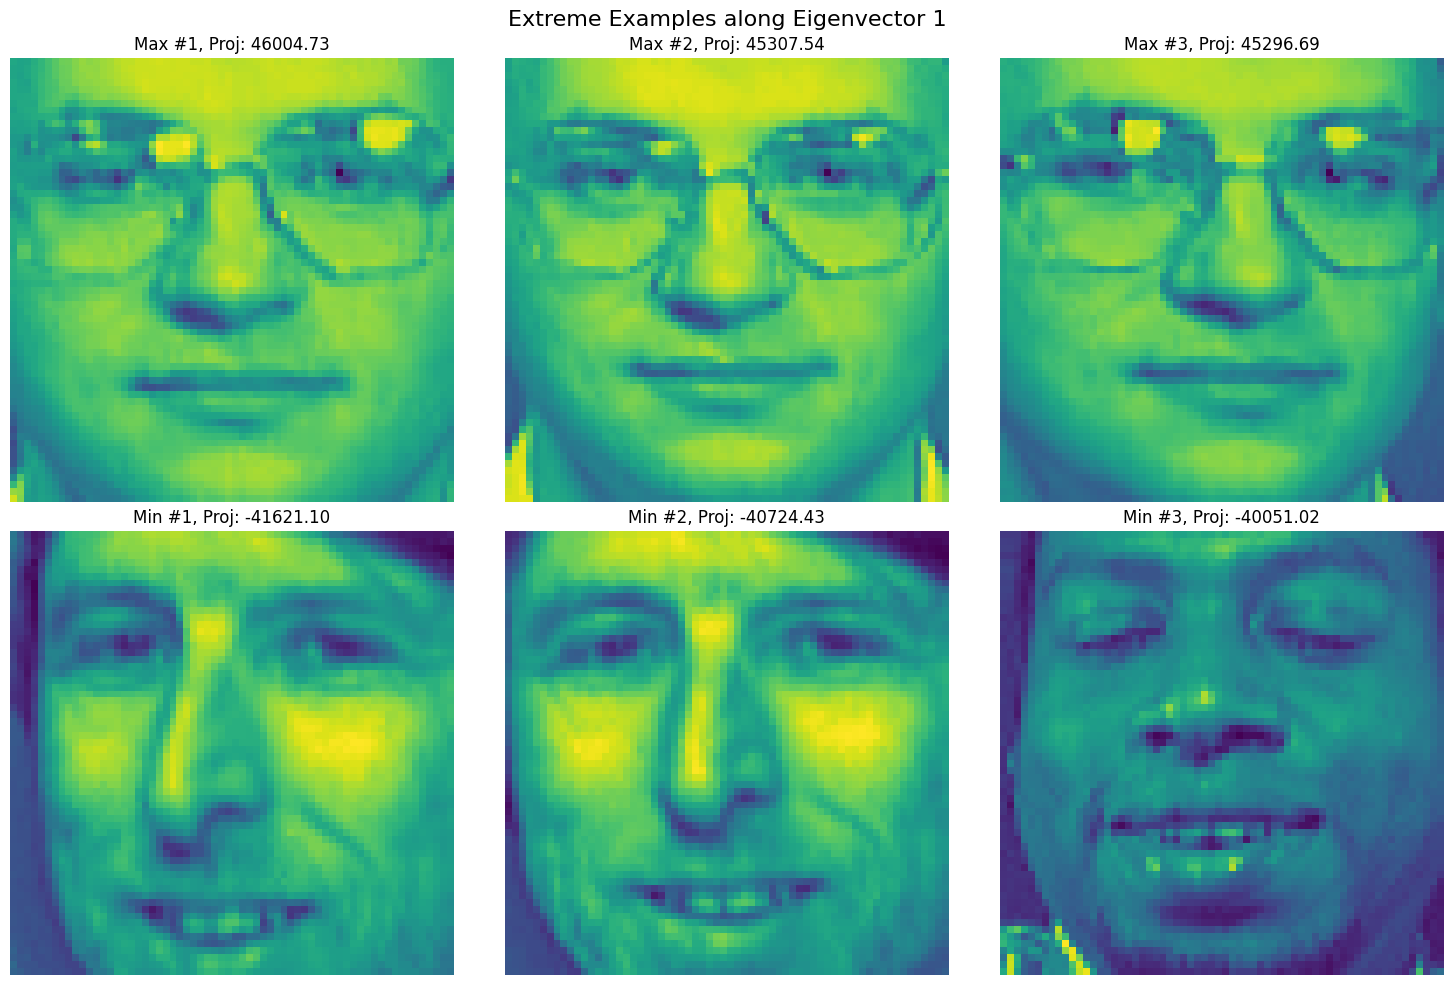

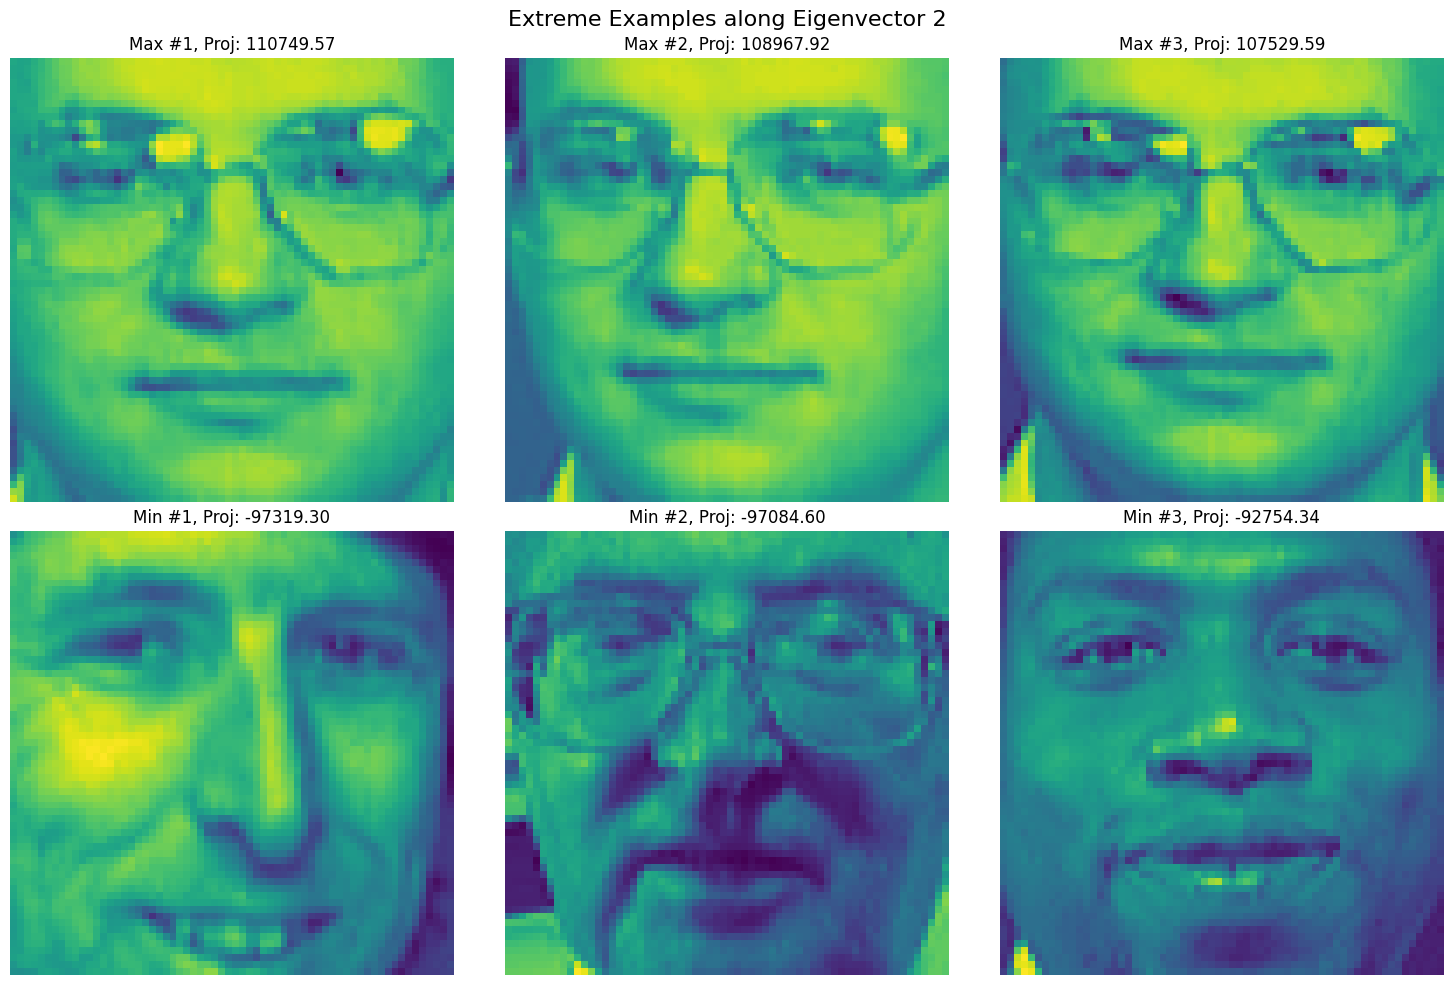

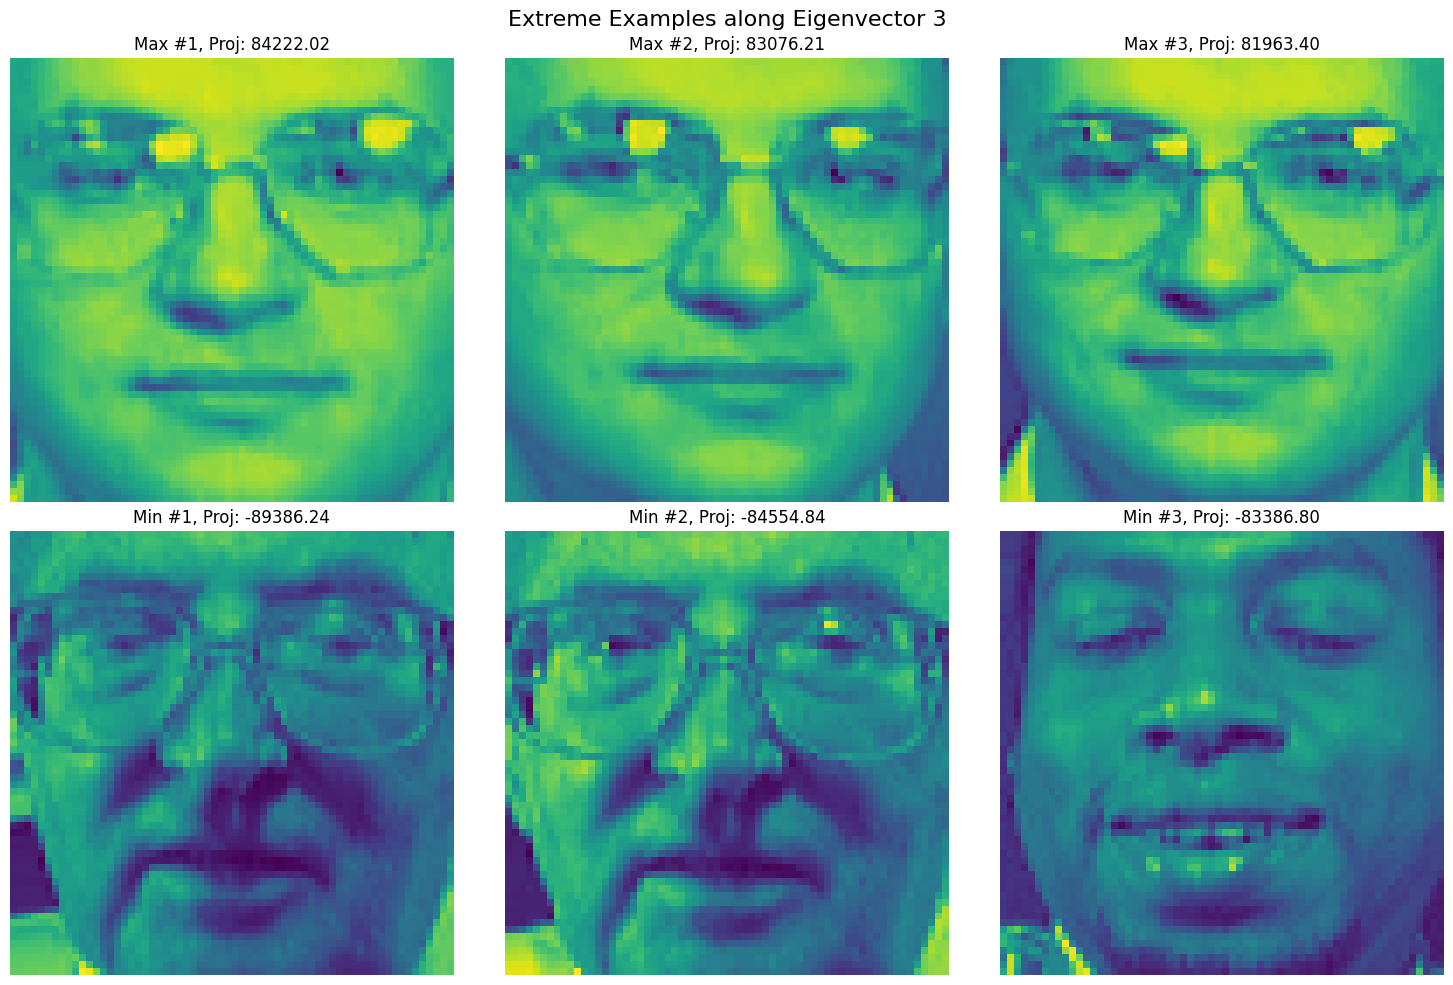

In [41]:
# Finding extreme examples
max_indices, min_indices, projections = find_extreme_examples(
    face_data, mean_face, eigenvectors, n_components = 3, n_extremes=3
)
# Visualize extreme examples
visualize_extreme_examples(
    face_data, max_indices, min_indices, projections, n_components=3, n_extremes=3
)

## Can you briefly describe the features associated with each of the top 3 eigenvectors?

**Answer**: Eigenvector 1 is likely capturing variations in facial orientation and pose. More to do with alignment and direction of the faces than color or features.  Eigenvector 2 seems to be capturing variations in the facial features details and expressions, such as the presence of glasses, opened or closed teeth, smile or not, lips positioning, etc.  Eigenvector 3 appears to be capturing differences in lighting and brightness in each face, as well as shadows resulting from facial features, like face cheeks, under lips, side chins.

# 4.d) Project and Reconstruct Faces

In [42]:
def project_and_reconstruct(face, mean_face, eigenvectors, n_components):
    """
    Project a face onto n_components principal components and reconstruct it.

    Args:
        face: Face vector to project and reconstruct
        mean_face: Mean face for centering
        eigenvectors: Principal components (eigenvectors)S
        n_components: Number of components to use

    Returns:
        reconstructed_face: Reconstructed face vector
    """
    # ToDo: Center the face
    centered_face = face - mean_face

    # ToDo: Project onto the principal components
    projection = centered_face @ eigenvectors[:, :n_components]

    # ToDo: Reconstruct the face
    reconstructed_face = (projection @ eigenvectors[:, :n_components].T) + mean_face

    return reconstructed_face.real  # Ensure the result is real (not complex)

In [43]:
def calculate_mse(original, reconstruction):
    """Calculate the Mean Squared Error between original and reconstruction."""
    # ToDo: Calculate the Mean Squared Error
    mse = np.mean((original - reconstruction) ** 2)
    return mse

In [44]:
# Components to use for reconstruction
components_list = [1, 5, 10, 20, 50, 100]

Performing reconstructions...
MSE with 1 components: 26090304.7773
MSE with 5 components: 2968006391.7989
MSE with 10 components: 2967920291.8071
MSE with 20 components: 2967963615.9580
MSE with 50 components: 2967959379.3388
MSE with 100 components: 2967980599.7342
Visualizing reconstructions...


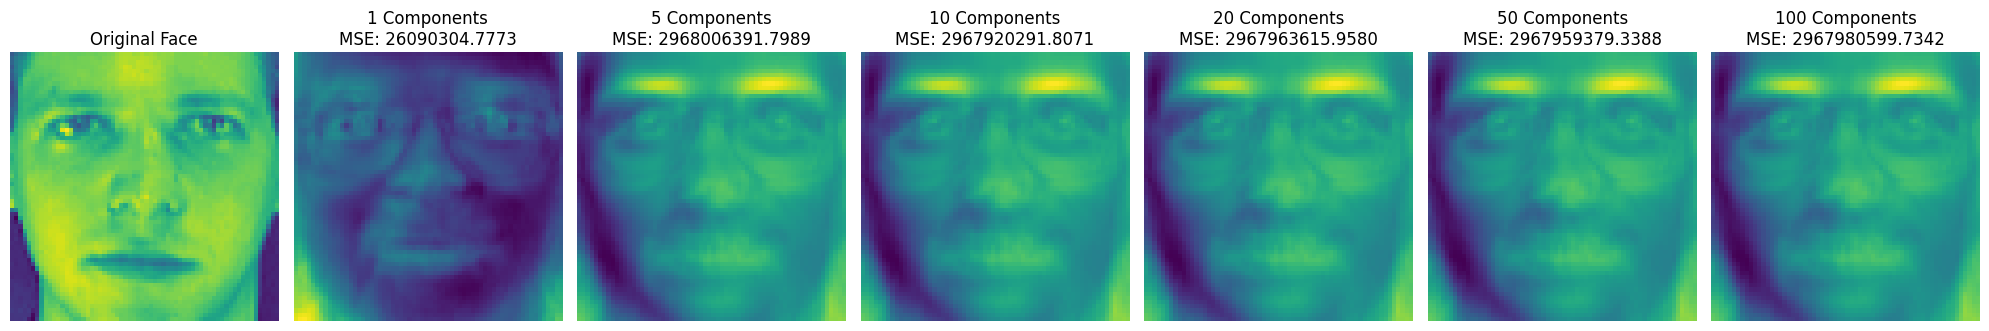

In [52]:
# Select a face image (e.g., the first face)
face_idx = 0  # Do not change the idx
selected_face = face_data[face_idx]

# Project and reconstruct using different numbers of components
print("Performing reconstructions...")
reconstructions = []
mse_values = []

for k in components_list:
    reconstructed_face = project_and_reconstruct(
        selected_face, mean_face, eigenvectors, k
    )
    reconstructions.append(reconstructed_face)

    # Calculate MSE
    mse = calculate_mse(selected_face, reconstructed_face)
    mse_values.append(mse)
    print(f"MSE with {k} components: {mse:.4f}")

# Visualize original face and reconstructions
print("Visualizing reconstructions...")
n_images = len(components_list) + 1  # Original + reconstructions
fig, axes = plt.subplots(1, n_images, figsize=(20, 5))

# Display original face
axes[0].imshow(selected_face.reshape(64, 64))
axes[0].set_title('Original Face')
axes[0].axis('off')

# Display reconstructions
for i, (k, reconstruction) in enumerate(zip(components_list, reconstructions)):
    axes[i+1].imshow(reconstruction.reshape(64, 64))
    axes[i+1].set_title(f'{k} Components\nMSE: {mse_values[i]:.4f}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.savefig('face_reconstructions.png')
plt.show()

# 4.e) Plot MSE and find optimal "k"

In [47]:
def plot_mse_vs_components(components_list, mse_values, save_path=None):
    """
    Plot Mean Squared Error vs Number of Components and identify point of diminishing returns.

    Parameters:
    -----------
    components_list : array-like
        List of component counts
    mse_values : array-like
        Corresponding MSE values for each component count
    save_path : str, optional
        Path to save the figure, if None, figure is not saved
    """
    import matplotlib.pyplot as plt
    import numpy as np

    plt.figure(figsize=(10, 6))
    plt.plot(components_list, mse_values, 'o-', linewidth=2)
    plt.xlabel('Number of Components')
    plt.ylabel('Mean Squared Error')
    plt.title('Reconstruction Error vs. Number of Components')
    plt.grid(True)

    elbow_components = None

    # Find the point of diminishing returns (if it exists)
    # Using the "elbow method" - look for the point where the rate of decrease slows down
    # https://en.wikipedia.org/wiki/Elbow_method_(clustering)
    if len(components_list) > 2:
        # ToDo: Calculate the rate of change of MSE
        mse_diff = np.diff(mse_values)
        rate_changes = np.abs(np.diff(mse_diff))

        # Find the index where rate of change is maximum (the "elbow")
        if len(rate_changes) > 0:
            elbow_idx = np.argmax(rate_changes) + 1  # +1 because of the diff operation
            elbow_components = components_list[elbow_idx]

            # Highlight the elbow point
            plt.scatter([elbow_components], [mse_values[elbow_idx]], color='red', s=100,
                        label=f'Diminishing returns at {elbow_components} components')
            plt.legend()

            print(f"Point of diminishing returns: {elbow_components} components")

    if save_path:
        plt.savefig(save_path)

    plt.show()

Point of diminishing returns: 5 components


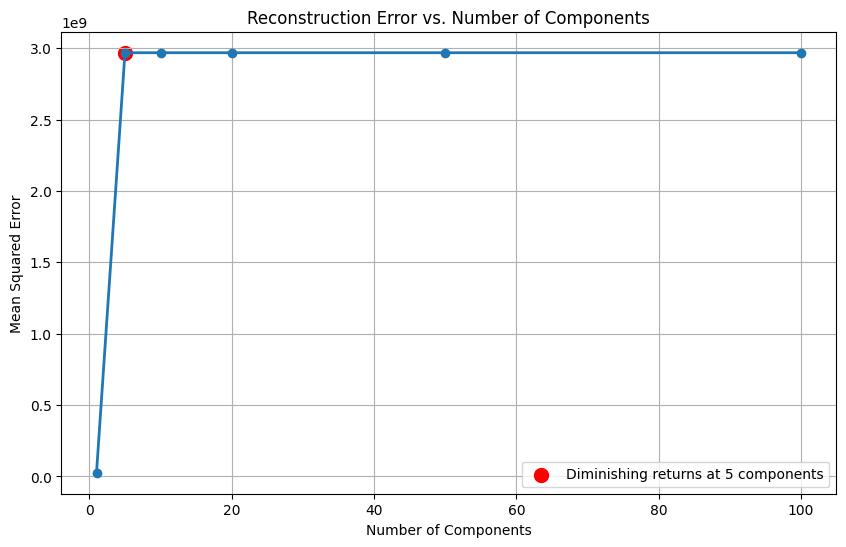

In [48]:
# Plot MSE vs. number of components
plot_mse_vs_components(components_list, mse_values, save_path='mse_vs_components.png')

### Plotting cumulative variance
**Note**: Cumulative explained variance in PCA represents the proportion of the total variance in the original dataset that is captured by a given number of principal components. It's calculated as the sum of the sorted eigenvalues up to a certain component, divided by the sum of all eigenvalues. This metric helps determine how many components to retain while preserving most of the information in the data.
    
A common approach is to select enough components to reach a threshold
(e.g., 95% of variance explained) or to identify an "elbow point" where
adding more components yields diminishing returns.

In [50]:
def plot_cumulative_variance(eigenvalues, components_list, save_path=None):
    """
    Plot cumulative explained variance from PCA eigenvalues and highlight specific component numbers.

    Parameters:
    -----------
    eigenvalues : array-like
        The eigenvalues from PCA, sorted in descending order
    components_list : array-like
        List of component numbers to highlight on the plot
    save_path : str, optional
        Path to save the figure, if None, figure is not saved
    """
    # ToDo: Compute variance explained by the eigenvalues
    cumulative_variance = np.cumsum(eigenvalues / np.sum(eigenvalues))

    # Determine how many components to show (either 100 or the length of eigenvalues)
    n_components_to_show = min(100, len(eigenvalues))

    # Plot cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_components_to_show + 1),
             cumulative_variance[:n_components_to_show],
             'b-', linewidth=2)
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Explained Variance vs. Number of Components')
    plt.grid(True)

    # Highlight the specified component numbers
    for k in components_list:
        if k <= len(eigenvalues):
            explained_variance = cumulative_variance[k-1]
            plt.scatter([k], [explained_variance], color='red')
            plt.annotate(f'{k}: {explained_variance:.2f}',
                         xy=(k, explained_variance),
                         xytext=(k+5, explained_variance),
                         arrowprops=dict(arrowstyle='->'))

    # Add a horizontal line at 0.95 (95% variance explained)
    plt.axhline(y=0.95, color='r', linestyle='--', alpha=0.5,
                label='95% Explained Variance')
    plt.legend()

    if save_path:
        plt.savefig(save_path)

    plt.show()

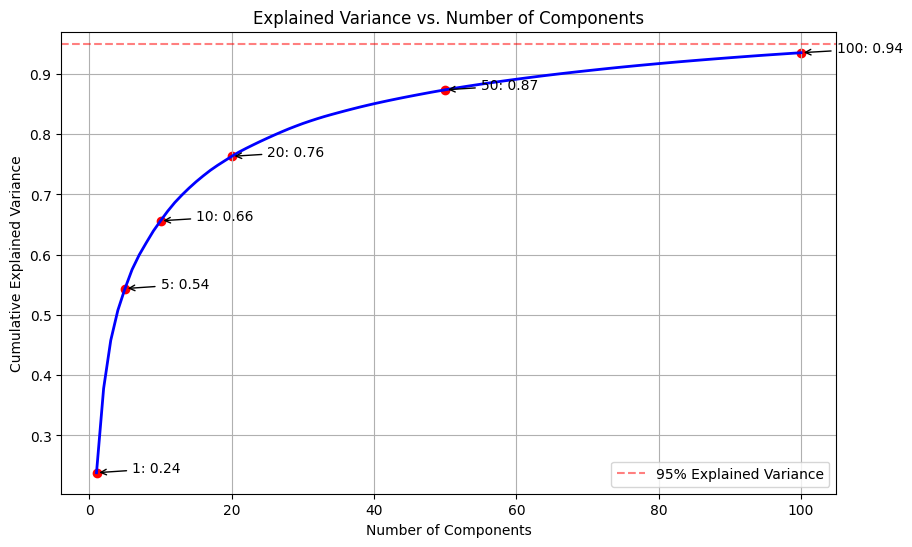

In [51]:
# Plot cumulative explained variance
plot_cumulative_variance(eigenvalues, components_list, save_path='explained_variance.png')

## Discuss the relationship between the point of diminishing returns identified in the MSE plot and the eigenvalue spectrum shown in the cumulative variance plot. Explain why this point occurs regarding the information content captured by the principal components.

**ANSWER:** The point of diminishing returns in the MSE plot aligns with where the cumulative variance plot starts to flatten, which is around 5 components. This occurs because the first few principal components capture most of the meaningful structure in the data, including lighting, pose, facial features, etc as we saw in problem 4c through 3 eigenvectors. Beyond that, additional components contribute only marginally, often representing noise or irrelevant features. As a result, reconstruction quality stops improving significantly despite increasing proportion of explained variance.